In [55]:
import numpy as np
import tensorflow as tf
import random

# Ce code au début du script, avant toute autre opération liée à TensorFlow ou à la
# manipulation de données, permet d'obtenir des résultats reproductibles à chaque exécution

# Fixer une graine pour NumPy
np.random.seed(42)

# Fixer une graine pour TensorFlow
tf.random.set_seed(42)

# Fixer une graine pour le générateur aléatoire de Python
random.seed(42)

In [56]:
import pandas as pd

In [57]:
df_fusionné = pd.read_csv('df_fusionné.csv')

In [58]:
# Applique une fonction anonyme à la première colonne du DataFrame fusionné pour binariser les étiquettes
# Dans ce cas, si la valeur de l'étiquette est différente de 'N', elle est remplacée par 0, sinon elle est remplacée par 1
df_fusionné_binaire = df_fusionné.copy()
df_fusionné_binaire.iloc[:, 0] = df_fusionné_binaire.iloc[:, 0].apply(lambda x: 0 if x != 'N' else 1)

In [59]:
df_fusionné_binaire

,ColumnName,0,1,2,3,4,5,6,7,8,...,350,351,352,353,354,355,356,357,358,359
0,1,0.462657,0.482548,0.484076,0.480509,0.483015,0.486312,0.486521,0.485864,0.486532,...,0.465025,0.465029,0.464824,0.464402,0.465701,0.466904,0.465382,0.464323,0.457096,0.448836
1,1,0.482615,0.482879,0.483021,0.482990,0.483850,0.485008,0.486124,0.487286,0.488439,...,0.481455,0.483832,0.481466,0.477827,0.472715,0.467784,0.468938,0.472220,0.476545,0.481245
2,1,0.476634,0.476991,0.476890,0.476314,0.476720,0.477318,0.477692,0.477965,0.477989,...,0.460408,0.458733,0.455923,0.453966,0.452707,0.452627,0.456283,0.461277,0.467851,0.474552
3,1,0.485052,0.485724,0.486199,0.486419,0.486915,0.487455,0.487805,0.488118,0.488656,...,0.463174,0.470400,0.471681,0.471369,0.471005,0.470679,0.473046,0.476238,0.479891,0.483542
4,1,0.460283,0.460354,0.460425,0.460504,0.460599,0.460698,0.460807,0.460913,0.460964,...,0.460193,0.460195,0.460194,0.460194,0.460202,0.460213,0.460214,0.460218,0.460221,0.460232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218983,1,0.504360,0.503927,0.503484,0.502999,0.502451,0.501895,0.501284,0.500694,0.500345,...,0.505341,0.505192,0.505112,0.505058,0.504968,0.504872,0.504834,0.504783,0.504750,0.504677
218984,1,0.470898,0.471617,0.472329,0.472988,0.473611,0.474224,0.474766,0.475305,0.476068,...,0.465742,0.461986,0.461522,0.462381,0.463621,0.465271,0.466413,0.467441,0.468726,0.470013
218985,1,0.500709,0.501071,0.501544,0.502152,0.502651,0.503131,0.503708,0.504286,0.504697,...,0.505848,0.503933,0.503743,0.503993,0.504325,0.504639,0.503961,0.503012,0.501867,0.500769
218986,1,0.471186,0.471236,0.471310,0.471411,0.471511,0.471623,0.471755,0.471905,0.472077,...,0.471733,0.471866,0.471858,0.471788,0.471710,0.471613,0.471508,0.471407,0.471289,0.471186


In [60]:
df_y = pd.read_csv('df_y.csv')
df_x = pd.read_csv('df_x.csv')

In [61]:
Y_anormal = df_y[df_y["ColumnName"] != "N"]
Y_anormal

,ColumnName
14,S
15,S
460,S
461,S
516,S
...,...
216643,V
217442,V
217443,V
218702,V


In [62]:
# on met Y en binaire avec 1 quand l'ECG est normal, et 0 sinon
#Y_binaire = np.where(Y != 'N', 0, 1)
#Y_binaire

In [63]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

# Supprimer les valeurs de X pour lesquelles Y vaut N pour avoir le meme nombre d'échantillons entre X et Y
# Trouver les indices où les valeurs de Y sont 'N'
indices_a_supprimer = np.where(df_y == 'N')[0]
# Supprimer les lignes correspondantes de X
X_anormal = np.delete(df_x, indices_a_supprimer, axis=0)

# On utilise la classe StabdarScaler pour normaliser nos données d'entrées
# Ici, on normalise car les réseaux de neurones sont sensibles à l'échelle des données
# Ca permet d'avoir des données avec une distribution standardisée
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X_anormal)
print(X_normalized)

# pour encoder les sorties anormales
# on aura 1 au niveau de la colonne représentant la classe en question
encoder = OneHotEncoder()
Y_encode = encoder.fit_transform(np.array(Y_anormal).reshape(-1, 1)).toarray()
print(Y_encode)

# Encoder sert à par exemple qd on a une colonne genre avec feminin ou masculin, créer 2 colonnes
# genre_feminin et genre_masculin avec 0 ou 1 suivant si la prsn est une femme ou un homme
# On encode généralement pour des données catégorielles (one hot encoding comme décrit plus haut) ou textuelles (word embedding)
# Avec notre Y_binaire, on a  pas besoin d'encoder car déjà une valeur numérique

[[-0.45477098 -0.43545776 -0.40090521 ... -0.36220015 -0.37598929
  -0.3387544 ]
 [-0.12124852 -0.1163598  -0.11099484 ... -0.05416879 -0.05912625
  -0.04496906]
 [-0.40664871 -0.4099921  -0.39860471 ... -0.28235588 -0.30293957
  -0.28116743]
 ...
 [-2.51227819 -2.45746437 -2.54985046 ...  0.25138219  0.0908943
   0.21659179]
 [-0.25066595 -0.24492593 -0.23331591 ... -0.1881204  -0.18921547
  -0.15817797]
 [ 0.23523189  0.23446491  0.21601046 ...  0.25769865  0.26662081
   0.26173482]]
[[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 ...
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]


In [64]:
print(X_normalized.shape)
print(Y_encode.shape)

(37726, 360)
(37726, 4)


In [65]:
from sklearn.model_selection import train_test_split

# Réduire X et Y à 20% de leur taille
#X_reduit, _, Y_reduit, _ = train_test_split(X_normalized, Y_encode, test_size=0.4, random_state=42)  # Conserve 20%, ignore 80%
# Split des données en test et entrainement
X_train, X_test, Y_train, Y_test = train_test_split(X_normalized, Y_encode, test_size=0.2, random_state=42) # random_state pour fixer 
                                                    # une graine aléatoire afin que les résultats soient toujours les memes, que tu recompiles ou non

In [66]:
# Dimensions de X_train
print(X_train.shape)
print(Y_train.shape)

# 3017 données
# colonnes en entrée  (1440) pour le nombre de fenetres étudiées
# colonnes en sortie (4) pour dire l'état d'ecg (valeur 1 ans la colonne correspondante)

(30180, 360)
(30180, 4)


In [67]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten

# Construction du modèle
model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)), # première couche de convolution
    MaxPooling1D(pool_size=2), # toujours associer à une couche de pooling pour réduire la dimensionnalité
    Flatten(), # pour applatir les sorties des couches précédentes en un vecteur pour pouvoir les connecter à des couches entièrement connectées
    Dense(32, activation='relu'),  # première couche entièrement connectée
                                  # à 100 neurones ca plantait donc j'ai mis 32
                                  # (détermine la complexité du modèle avec sa capacité à apprendre des relations complexes entre les caractéristiques (X))
                                  # c'est mieux de choisir un nombre de neurones en 2^
    Dense(4, activation='softmax') # deuxième avec une activation softmax pour prédire les proba des classes de sortie (ici que Y)
    # 4 neurones pour la dernière couche car 4 classes de sortie
])

# le nombre de filtres détermine le nb de caracteristiques ou de motifs différents que la couche peut extraire des données
# la taille du noyau détermine la taille de la fenetre utilisée pour calculer les convolutions sur les données d'entrée X
# la fonction d'activation est généralement relu pr controler la non linéarité dans le modèle puis softmax pr les proba

c:\Users\Utilisateur\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [68]:
# Compilation du modèle

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# ici on choisit la fonction de perte categorical_crossentropy car notre sortie Y est une catégorisation à 4 classes en fction de l'anomalie
# on peut aussi choisir la fonction de perte binary_crossentropy si notre sortie Y était binaire (normal ou anormal par exemple)
# l'optimiseur met à jour les poids du modèle lors de l'entrainement pr minimiser la fonction de perte et est généralement adam, sgd..
# métriques pour évaluer les performances du modèle donc ici on choisit la précision

In [69]:
# Entrainement du modèle

model.fit(X_train, Y_train, epochs=2, batch_size=10, validation_data=(X_test, Y_test)) # normalement 10 et 32 mais plante

Epoch 1/2
3018/3018 ━━━━━━━━━━━━━━━━━━━━ 42s 12ms/step - accuracy: 0.6267 - loss: 0.8832 - val_accuracy: 0.7996 - val_loss: 0.5782
Epoch 2/2
3018/3018 ━━━━━━━━━━━━━━━━━━━━ 42s 14ms/step - accuracy: 0.8210 - loss: 0.5176 - val_accuracy: 0.8484 - val_loss: 0.4509


236/236 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


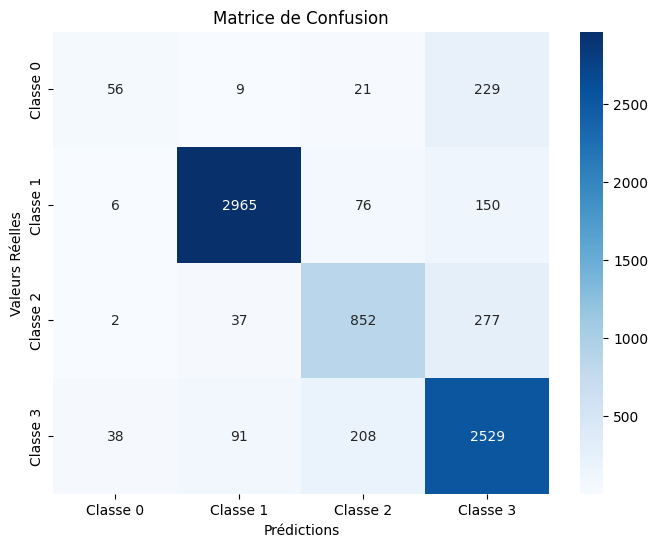

Rapport de classification :
              precision    recall  f1-score   support

           0       0.55      0.18      0.27       315
           1       0.96      0.93      0.94      3197
           2       0.74      0.73      0.73      1168
           3       0.79      0.88      0.84      2866

    accuracy                           0.85      7546
   macro avg       0.76      0.68      0.69      7546
weighted avg       0.84      0.85      0.84      7546



In [70]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Faire des prédictions sur l'ensemble de test
Y_pred = model.predict(X_test)

# Convertir les prédictions en étiquettes de classe
predicted_labels = np.argmax(Y_pred, axis=1)
true_labels = np.argmax(Y_test, axis=1)

# Créer la matrice de confusion
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Affichage de la matrice de confusion avec Seaborn pour une visualisation améliorée
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[f"Classe {i}" for i in range(np.max(true_labels) + 1)], yticklabels=[f"Classe {i}" for i in range(np.max(true_labels) + 1)])
plt.title("Matrice de Confusion")
plt.xlabel("Prédictions")
plt.ylabel("Valeurs Réelles")
plt.show()

# Affichage du rapport de classification pour fournir des métriques supplémentaires
print("Rapport de classification :")
print(classification_report(true_labels, predicted_labels))


In [75]:
import keras_tuner as kt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.optimizers import Adam

def build_best_model(hp):
    model = Sequential()
    
    # Choix du nombre de couches Conv1D
    num_conv_layers = hp.Int('num_conv_layers', 1, 3, step=1)
    for i in range(num_conv_layers):
        model.add(Conv1D(
            filters=hp.Int(f'filters_{i}', min_value=32, max_value=128, step=32),
            kernel_size=hp.Choice(f'kernel_size_{i}', values=[3, 5, 7]),
            activation='relu',
            input_shape=(X_train.shape[1], 1) if i == 0 else None))
        model.add(MaxPooling1D(pool_size=2))
    
    model.add(Flatten())

    # Choix du nombre de couches Dense
    num_dense_layers = hp.Int('num_dense_layers', 1, 4, step=1)
    for j in range(num_dense_layers):
        model.add(Dense(
            units=hp.Int(f'units_{j}', min_value=32, max_value=512, step=32),
            activation='relu'))
    
    # Couche de sortie
    model.add(Dense(4, activation='softmax'))  # Assumant 4 classes de sortie

    # Compilation du modèle
    model.compile(
        optimizer=Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
        loss='categorical_crossentropy',
        metrics=['accuracy'])

    return model

# Configuration du tuner
tuner = kt.Hyperband(
    build_best_model,
    objective='val_accuracy',
    max_epochs=50,
    factor=3,
    directory='my_dir',
    project_name='intro_to_kt',
    overwrite=True  # Ajouté pour assurer que le projet commence à neuf si déjà existant
)

# Callback pour l'arrêt précoce
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

# Recherche d'hyperparamètres
tuner.search(
    X_train, Y_train,
    epochs=50,
    validation_data=(X_test, Y_test),
    callbacks=[stop_early]
)

# Récupération des meilleurs hyperparamètres
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Affichage des meilleurs hyperparamètres trouvés
print(f"Optimal number of Conv1D layers: {best_hps.get('num_conv_layers')}")
for i in range(best_hps.get('num_conv_layers')):
    print(f" - Conv1D layer {i+1} - Filters: {best_hps.get(f'filters_{i}')}, Kernel Size: {best_hps.get(f'kernel_size_{i}')}")
print(f"Optimal number of Dense layers: {best_hps.get('num_dense_layers')}")
for j in range(best_hps.get('num_dense_layers')):
    print(f" - Dense layer {j+1} - Units: {best_hps.get(f'units_{j}')}")
print(f"Optimal learning rate: {best_hps.get('learning_rate')}")

Trial 90 Complete [00h 04m 40s]
val_accuracy: 0.42366817593574524

Best val_accuracy So Far: 0.9434137344360352
Total elapsed time: 07h 23m 50s
Optimal number of Conv1D layers: 3
 - Conv1D layer 1 - Filters: 64, Kernel Size: 5
 - Conv1D layer 2 - Filters: 128, Kernel Size: 7
 - Conv1D layer 3 - Filters: 64, Kernel Size: 7
Optimal number of Dense layers: 2
 - Dense layer 1 - Units: 128
 - Dense layer 2 - Units: 256
Optimal learning rate: 0.001


In [76]:
# Construction et entraînement du meilleur modèle
best_model = tuner.hypermodel.build(best_hps)
best_model.fit(X_train, Y_train, epochs=50, validation_data=(X_test, Y_test))

Epoch 1/50
944/944 ━━━━━━━━━━━━━━━━━━━━ 24s 25ms/step - accuracy: 0.6978 - loss: 0.7053 - val_accuracy: 0.9143 - val_loss: 0.2484
Epoch 2/50
944/944 ━━━━━━━━━━━━━━━━━━━━ 38s 41ms/step - accuracy: 0.9170 - loss: 0.2520 - val_accuracy: 0.9245 - val_loss: 0.2116
Epoch 3/50
944/944 ━━━━━━━━━━━━━━━━━━━━ 40s 42ms/step - accuracy: 0.9367 - loss: 0.1863 - val_accuracy: 0.9344 - val_loss: 0.1941
Epoch 4/50
944/944 ━━━━━━━━━━━━━━━━━━━━ 41s 44ms/step - accuracy: 0.9507 - loss: 0.1450 - val_accuracy: 0.9332 - val_loss: 0.2121
Epoch 5/50
944/944 ━━━━━━━━━━━━━━━━━━━━ 44s 46ms/step - accuracy: 0.9567 - loss: 0.1212 - val_accuracy: 0.9363 - val_loss: 0.2051
Epoch 6/50
944/944 ━━━━━━━━━━━━━━━━━━━━ 45s 47ms/step - accuracy: 0.9646 - loss: 0.0948 - val_accuracy: 0.9378 - val_loss: 0.2267
Epoch 7/50
944/944 ━━━━━━━━━━━━━━━━━━━━ 45s 48ms/step - accuracy: 0.9707 - loss: 0.0837 - val_accuracy: 0.9367 - val_loss: 0.2227
Epoch 8/50
944/944 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - accuracy: 0.9736 - loss: 0.0720 - 

236/236 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


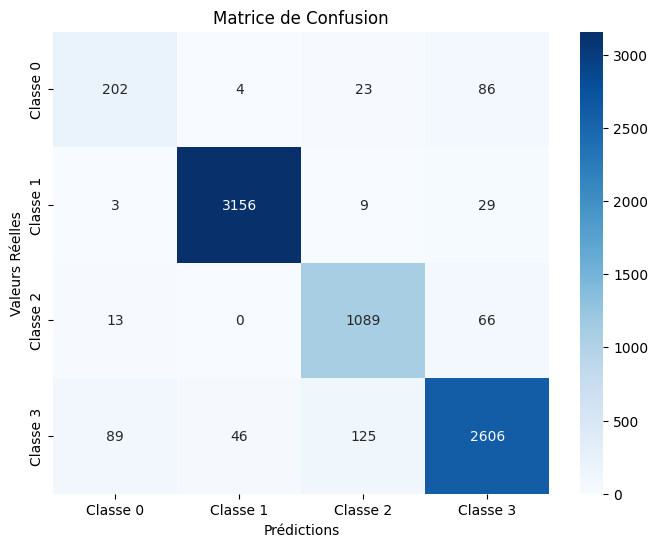

Rapport de classification :
              precision    recall  f1-score   support

           0       0.66      0.64      0.65       315
           1       0.98      0.99      0.99      3197
           2       0.87      0.93      0.90      1168
           3       0.94      0.91      0.92      2866

    accuracy                           0.93      7546
   macro avg       0.86      0.87      0.86      7546
weighted avg       0.93      0.93      0.93      7546



In [77]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Faire des prédictions sur l'ensemble de test
Y_pred = best_model.predict(X_test)

# Convertir les prédictions en étiquettes de classe
predicted_labels = np.argmax(Y_pred, axis=1)
true_labels = np.argmax(Y_test, axis=1)

# Créer la matrice de confusion
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Affichage de la matrice de confusion avec Seaborn pour une visualisation améliorée
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[f"Classe {i}" for i in range(np.max(true_labels) + 1)], yticklabels=[f"Classe {i}" for i in range(np.max(true_labels) + 1)])
plt.title("Matrice de Confusion")
plt.xlabel("Prédictions")
plt.ylabel("Valeurs Réelles")
plt.show()

# Affichage du rapport de classification pour fournir des métriques supplémentaires
print("Rapport de classification :")
print(classification_report(true_labels, predicted_labels))